# Fourier transform

It's integeral transform that takes a function as input then ouputs another function that describes which frequenties are present in the original function

## Discrete Fourier transform

It measures any signal in time and extracts the frequencies in that signal. In practice, we do not have a continuous signal of $x(t)$. Rather, we have N sample data points from n=0 to N-1. Hence, the Discrete Fourier transform is of practical interest to us.

### Why do we use Fourier transform?

When we observe data, typically signal data or time-series data, features that we are interested in are better studied in frequency domain, rather than spatial or time domain.

### Discrete Fourier Transform

From our undergraduate Calculus III course, recall the continuous Fourier transform is
$$
X(F) = \int_{-\infty}^{\infty}x(t) e^{-i2\pi Ft}dt.
$$

But in practice, we don't have a continuous function. We observe and measure a set of discrete points. So it is more practical for us to have the the discrete form of
$$
X_k = \sum_{n=0}^{N-1} x_n e^{-\frac{-i2\pi kn}{N}},
$$

where $\frac{k}{N} \approx F \text{ and } n\approx t$.

$k$ refers to the k-th frequency. Then, let's expand the sum while calling the exponential term of $\frac{-i2\pi kn}{N}$ as simply $b_n$.

The resulting $X_k$ is 
$$
X_k = x_0 e^{-b_0i} + x_1 e^{-b_1i} + ... + x_{N-1} e^{-b_{N-1}i}.
$$ 

Using the Euler's formula of $e^{ix} = \cos x + i \sin x$, we can further simplify the above equation into
$$
X_k = x_0[\cos(-b_0) + i\sin(-b_0)] + ... + x_{N-1}[\cos(-b_{N-1}) + i\sin(-b_{N-1})].
$$

By summing the terms on the RHS, at the end, we get a complex number of

$$
X_k = A_k + iB_k.
$$

Now, you can plot it on the complex coordination and compute the angle of $\theta$. The magnitude is determined by computing $\sqrt{{A_k}^2 + {B_k}^2}$. The angle $\theta$ is computed as $tan^{-1}\frac{B_k}{A_k}$. The phase represents how much the sinosodal bin is shifted.

Now, it might be still abstract to understand what $X_k$ means, which is the "kth" frequency bin. But for pedagogial reasons let's try to manully compute $X_1$ To compute $X_1$, we need values of $x_n$. Imagine you have the values of $x_0$ = 0, $x_1$ = 0.707, $x_2$ = 1, $x_3$ = 0.707, and so on. Then, you can compute the value of $X_0$, $X_1$, $X_2$, $X_3$, and so on as well. For the sake of brevity, we will only manually compute $X_1$ as shown below:

\begin{align*}
X_1 &= 0 \cdot e^{\frac{j 2\pi (1)(0)}{8}} + 0.707 \cdot e^{\frac{j 2\pi (1)(1)}{8}} + 1 \cdot e^{\frac{j 2\pi (1)(2)}{8}} + \cdots \\
X_1 &= 0 + 0.707 \left[\cos\left(-\frac{\pi}{4}\right) + j \sin\left(-\frac{\pi}{4}\right)\right] + 1 \left[\cos\left(-\frac{\pi}{2}\right) + j \sin\left(-\frac{\pi}{2}\right)\right] + \cdots \\
X_1 &= 0 + (0.5 - 0.5j) + (-j) + (-0.5 - 0.5j) + (0.5 - 0.5j) + (-j) + (-0.5 - 0.5j) \\
X_1 &= -4j
\end{align*}

Now you can compute $X_1$ by computing the magnitude.  

### What is FFTs?

FFT stands for Fast Fourier Transform. We are given the basis vector $x_n$, which is a $1 \times N$ matrix. We also have another $N \times N$ matrix of the $e^{\frac{-i 2 \pi k n}{N}}$ terms. Each column represents $k_n$, and the remaining rows contain the $\cos(-b_{N-1}) + i \sin(-b_{N-1})$ terms. So, when we take the dot product of the two, we get a $1 \times N$ vector of $X_k$ terms.

### Convolution Theorem

The Fourier transform of a convolution of two functions is equal to the product of their individual Fourier transforms.

$$
\mathcal{F}\{f(x) * g(x)\} = \mathcal{F}\{f(x)\} \cdot \mathcal{F}\{g(x)\}
$$

And conversely:

$$
\mathcal{F}^{-1}\{F(k) \cdot G(k)\} = f(x) * g(x)
$$

### Why do we sometimes use just look at the absolute value of FFT?

TBA

### Acknowledgements

The example for the Discrete Fourier is from Simon Xu's YouTube [video](https://www.youtube.com/watch?v=mkGsMWi_j4Q).


## 2D Fourier Transform

$$
F(u,v) = \iint_{-\infty}^{\infty}f(x,y)e^{-i2\pi (ux+vy)}dxdy
$$

where $u$ and $v$ are frequencies along $x$ and $y$, respectively.

2D Discrete Images would be

$$
F[p,q] = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f[m,n] e^{-i2\pi pm/m} e^{-i2\pi qn/N}
$$

where $p$ and $q$ are frequencies along $m$ and $n$, respectively.

The Inverse Discrete Fourier Transform is 

$$
f[m,n] = \frac{1}{MN} \sum_{p=0}^{M-1}\sum_{q=0}^{N-1} F[p,q]e^{i2\pi pm/M}e^{i2\pi qn/N}
$$ -->

In [5]:
import numpy as np
import matplotlib.pyplot as plt

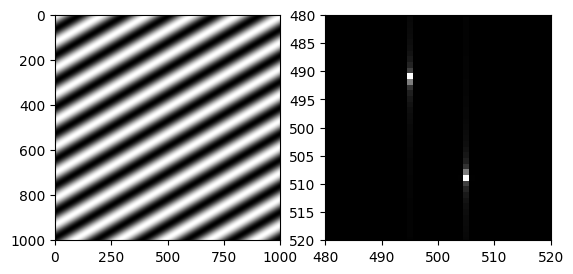

In [6]:
# gratings.py
# Source: https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 100
angle = np.pi/3
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier transform of grating
# Shift the zero-frequency component to the center
ft = np.fft.fft2(grating)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

Text(0.5, 1.0, 'Plot of F(u) = 1/2[δ(u+k) + δ(u-k)] for k=1')

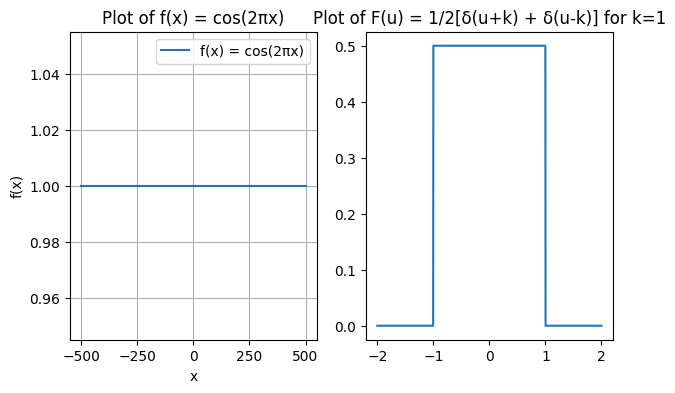

In [7]:
# Draw f(x) = cos 2pikx in matplotlib
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.cos(2 * np.pi * x)
def F(u, k):
    return 0.5 * (np.heaviside(u + k, 1) - np.heaviside(u - k, 1))
u = np.linspace(-2, 2, 1000)
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.plot(x, f(x), label='f(x) = cos(2πx)')
plt.title('Plot of f(x) = cos(2πx)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
x = np.linspace(0, 1, 1000)
plt.plot(u, F(u, 1), label='F(u) for k=1')
plt.title('Plot of F(u) = 1/2[δ(u+k) + δ(u-k)] for k=1')




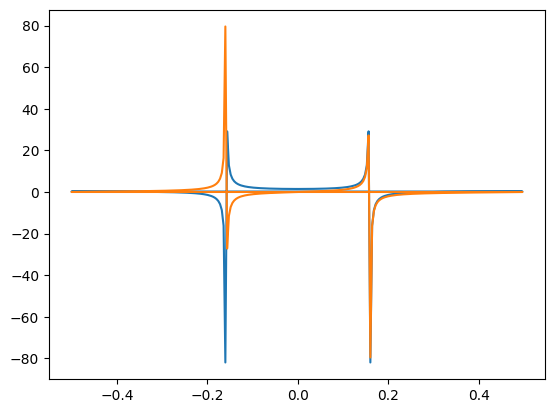

In [8]:

t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)

### Why diescrete Fourier transform?

The nature of data we collect is discrete, not continous.

Why transform? Often it's not obvious to analyze or extract data from the domain. It can be eaiser to analyze in frequency domain.
ll
Power spectru, power spectral denstiy, 

Imagine you have a circle. A ball rolls along the circle. The circle would have travelled by the distance of $2\pi R$ to reach the original position. Here $R$ is the radius of the circle. Due to its periodic nature, it can be written using Fourier series:

$$
\psi(x) = \sum_n A_n \cos \left(\frac{nx}{R}\right) + B_n \sin \left(\frac{nx}{R}\right)
$$


We first assume that the wave is a periodic function with the period of $2\pi R$:

$$
\psi(x) = \psi(x + 2\pi R)
$$

We can further simplify the equation using Euler's identify of $e^{i\theta} = \cos(\theta) + i \sin(\theta)$ so it becomes

As a result, the Fourier series finally becomes Fourier series more convieniently as

$$ \psi(x) = \sum_{n=-{\infty}}^\infty \psi_n e^{inx/R}.$$

where $\theta = \frac{nx}{R}$.

Let us then further simplify the expression in the exponential by defining $k\equiv \frac{n}{R}$

$$ \psi(x) = \sum_{n=-{\infty}}^\infty \psi_n e^{ikx}.$$

here $k$ is the wavenumber. If you try to make sense out of $e^{ikx}$ you can try to further use Euler's identify of

$e^{ikx} = \cos(kx) + i \sin(kx)$

As you increase the value of $k$, you would imagine there will be a greater number of oscilations of the wave. Hence, often time, the greater $k$, the greater "momentum" transfer would occur.

The term "momentum" makes sense physical.

Imagine you are standing near the beach. The wave comes at you. Now, if the wave has a lot of oscilations, you body will be tumblled downs up and down more rapidly and there is a change in velocity of your body. This is momentum change where it is defined as $p=mv$!

Of course, this is a bit abstract for now. The $e^{inx/R}$ is the basis and $\psi_n$ is the coefifcient. 

Now, how would you do Fouier transformation for $\psi(x)$?

There is a mathematicl trick to this. Please each side by $e^{-imx/R}$:

$$
e^{-imx/R}\psi(x) = \sum_{-\infty}^\infty \psi_n e^{inx/R} e^{-imx/R}
$$ 

and integrate both sides from $-\pi R$ to $\pi R$, the circumference of the circle:

$$
\int_{-\pi R}^{\pi R}dx e^{-imx/R}\psi(x) = \sum_{-\infty}^\infty \psi_n \int_{-\pi R}^{\pi R} e^{inx/R} e^{-imx/R}
$$ 

$$
\int_{-\pi R}^{\pi R}dx e^{-imx/R}\psi(x) = \sum_{-\infty}^\infty \psi_n \int_{-\pi R}^{\pi R} e^{i(n-m)x/R}
$$ 

On the right hand side, because it's a sinusoidal function, when $n\neq m$, it's zero. But when $n=m$ the right hand side simply becomes $2\pi R$

$$
\int_{-\pi R}^{\pi R}dx e^{-imx/R}\psi(x) = 
\sum_{n=-\infty}^{\infty} \psi_n \times 
\begin{cases}
    0 & \text{if } n \ne m \\
    2\pi R & \text{if } n = m
\end{cases}
$$ 

Finally

$$
\psi_m = \frac{1}{2\pi R} \int_{-\pi R}^{\pi R} dx e^{-imx/R} \psi(x)
$$

Of course, we noted that $m=n$, so we can simply re-write it as 

$$
\psi_n = \frac{1}{2\pi R} \int_{-\pi R}^{\pi R} dx e^{-inx/R} \psi(x)
$$




### Quantuem mechanics

Recall we have this "momentem operator" where it is $P = \frac{\hbar}{i} \frac{d}{dx}$ in quantum mechanics:

$$
P\psi(x) = \frac{\hbar}{i} \frac{d}{dx} \psi(x)
$$

which 

$$
P\psi(x) = \frac{\hbar}{i} ik e^{ikx}
$$

$$
P\psi(x) = \hbar k e^{ikx}
$$

Now, $e^{ikx}$ is the eigenfunction of the momentum operatorand $\hbar k$ is the eigenvalue.


$$
\hat{\psi}(k) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} dx e^{-ikx}\psi(x)
$$


## GPAW abTEM code

The indepnednet atom model (IAM) neglects bonding.